# STOR 320: Introduction to Data Science
## Spring 2025
## EDA Group 4 (Ex: EDA Group 12)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Creator: Landon Hawley

### Q1:
Did the pass interference review rule change cause a decrease in pass
interference calls in the 2019 season as compared to other seasons without the rule?

<ipython-input-48-eddb28bb2810>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_pi['Count of Pass Interference'] = extracted_number_def_pi.groupby(level = 0)[0].sum().astype(int)
<ipython-input-48-eddb28bb2810>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_pi['Count of Pass Interference'] = extracted_number_off_pi.groupby(level = 0)[0].sum().astype(int)


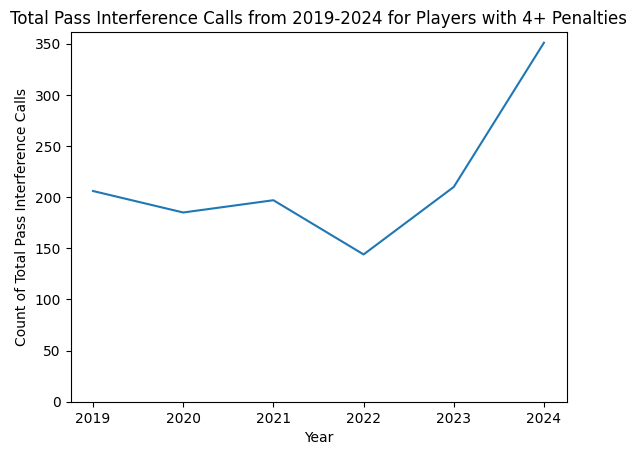

In [ ]:
# Code here for Q1
total_penalties = pd.read_csv('Total_Penalties.csv')
total_penalties.head()

def_pi = total_penalties[total_penalties['Penalty Types'].str.contains('Defensive Pass Interference', case = False)]
off_pi = total_penalties[total_penalties['Penalty Types'].str.contains('Offensive Pass Interference', case = False)]

# have to make a new column using count in parentheses for each row
extracted_number_def_pi = def_pi['Penalty Types'].str.extractall(r'Defensive Pass Interference \((\d+)\)')
extracted_number_off_pi = off_pi['Penalty Types'].str.extractall(r'Offensive Pass Interference \((\d+)\)')
def_pi['Count of Pass Interference'] = extracted_number_def_pi.groupby(level = 0)[0].sum().astype(int)
off_pi['Count of Pass Interference'] = extracted_number_off_pi.groupby(level = 0)[0].sum().astype(int)

penalties_only_pi = pd.concat([def_pi, off_pi], axis = 0)

# group by year to get totals
pi_grouped_year = penalties_only_pi.groupby('Year').aggregate({'Count of Pass Interference': 'sum'}).reset_index()

plt.plot(pi_grouped_year['Year'], pi_grouped_year['Count of Pass Interference'])
plt.title('Total Pass Interference Calls from 2019-2024 for Players with 4+ Penalties')
plt.xlabel('Year')
plt.ylabel('Count of Total Pass Interference Calls')
plt.ylim(bottom=0);

### Q2:
Do teams that score more touchdowns have more taunting penalties?

<ipython-input-47-d848f7e35b3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_start_only['Count of False Start'] = extracted_number_false_start.groupby(level = 0)[0].sum().astype(int)


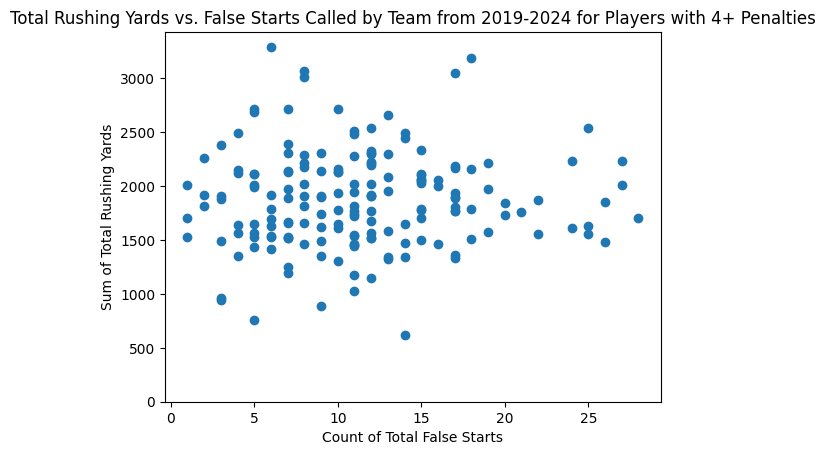

In [ ]:
# Code here for Q2
total_penalties = pd.read_csv('Total_Penalties.csv')
total_penalties.head()

#Mapping team names to their abbreviations
team_name_map = {
    "Arizona": "ARI", "Atlanta": "ATL", "Baltimore": "BAL", "Buffalo": "BUF", "Carolina": "CAR",
    "Chicago": "CHI", "Cincinnati": "CIN", "Cleveland": "CLE", "Dallas": "DAL", "Denver": "DEN",
    "Detroit": "DET", "Green Bay": "GB", "Houston": "HOU", "Indianapolis": "IND", "Jacksonville": "JAX",
    "Kansas City": "KC", "Las Vegas": "LV", "LA Chargers": "LAC", "LA Rams": "LAR", "Miami": "MIA",
    "Minnesota": "MIN", "New England": "NE", "New Orleans": "NO", "NY Giants": "NYG", "NY Jets": "NYJ",
    "Philadelphia": "PHI", "Pittsburgh": "PIT", "San Francisco": "SF", "Seattle": "SEA",
    "Tampa Bay": "TB", "Tennessee": "TEN", "Washington": "WAS"
}
total_penalties['Team'] = total_penalties['Team'].map(team_name_map)

false_start_only = total_penalties[total_penalties['Penalty Types'].str.contains('False Start', case = False)]
extracted_number_false_start = false_start_only['Penalty Types'].str.extractall(r'False Start \((\d+)\)')
false_start_only['Count of False Start'] = extracted_number_false_start.groupby(level = 0)[0].sum().astype(int)

false_starts_team = false_start_only.groupby(['Year', 'Team'])['Count of False Start'].sum().reset_index()

rushing = pd.read_csv('Total_Rushing.csv')

#Map to convert Oakland Raiders to Las Vegas Raiders
oak_map = {
    "ARI": "ARI", "ATL": "ATL", "BAL": "BAL", "BUF": "BUF", "CAR": "CAR",
    "CHI": "CHI", "CIN": "CIN", "CLE": "CLE", "DAL": "DAL", "DEN": "DEN",
    "DET": "DET", "GB": "GB", "HOU": "HOU", "IND": "IND", "JAX": "JAX",
    "KC": "KC", "LV": "LV", "LAC": "LAC", "LAR": "LAR", "MIA": "MIA",
    "MIN": "MIN", "NE": "NE", "NO": "NO", "NYG": "NYG", "NYJ": "NYJ",
    "PHI": "PHI", "PIT": "PIT", "SF": "SF", "SEA": "SEA",
    "TB": "TB", "TEN": "TEN", "WSH": "WSH", "OAK": "LV"
}
rushing['Team'] = rushing['Team'].map(oak_map)

rushing['Rushing Yards'] = rushing['Rushing Yards'].str.replace(',', '').astype(int)
rushing_yards_team = rushing.groupby(['Year', 'Team'])['Rushing Yards'].sum().reset_index()

false_start_rushing_yards_team = pd.merge(false_starts_team, rushing_yards_team, on = ['Year', 'Team'])

plt.scatter(false_start_rushing_yards_team['Count of False Start'], false_start_rushing_yards_team['Rushing Yards'])
plt.title('Total Rushing Yards vs. False Starts Called by Team from 2019-2024 for Players with 4+ Penalties')
plt.xlabel('Count of Total False Starts')
plt.ylabel('Sum of Total Rushing Yards')
plt.ylim(bottom=0);

NOTE: The question above was changed from the Project Proposal due to the fact that our original question number 2 involved asking about touchdowns. Touchdowns was not found in any of our other questions and was not something we were going to investigate further, so it did not seem necessary. In addition, to get the touchdown data by teams over the years, we would've had to scrape more datasets in addition to the 30 sets (each stat by year) that have already been scraped, and this wouldn't have provided further information to help with our analysis.

## Interpreter: Joe Zakszewski

### Q1:
Did the number of pre-snap penalties in covid years (2020 and 2021)
decrease relative to non-covid years?

,Year,Pre-Snap,Total Flags,Proportion of Total Flags
0,2019,550,1850,0.297297
1,2020,412,1240,0.332258
2,2021,497,1606,0.309465
3,2022,447,1449,0.308489
4,2023,526,1596,0.329574
5,2024,1062,3095,0.343134


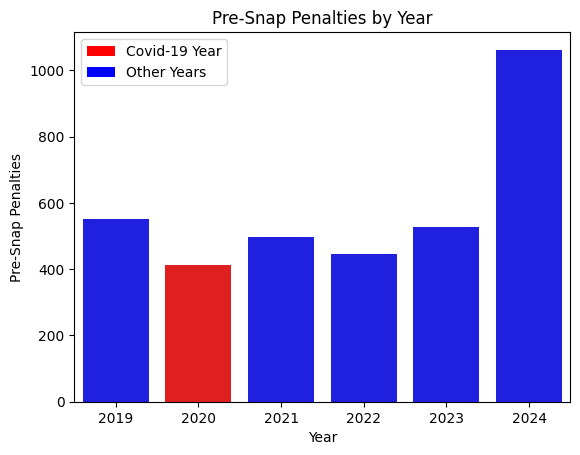

,Year,Team,Offensive Holding
0,2019,ARI,11
1,2019,ATL,20
2,2019,BAL,14
3,2019,BUF,20
4,2019,CAR,5
...,...,...,...
174,2024,SEA,27
175,2024,SF,25
176,2024,TB,21
177,2024,TEN,27


,Year,Team,Rushing Attempts
0,2019,ARI,270
1,2019,ATL,360
2,2019,BAL,595
3,2019,BUF,465
4,2019,CAR,384
...,...,...,...
187,2024,SEA,382
188,2024,SF,457
189,2024,TB,483
190,2024,TEN,450


In [ ]:
# Code here for Q1
pentalties = pd.read_csv('Total_Penalties.csv')
#pentalties.head()
rushing = pd.read_csv('Total_Rushing.csv')
#rushing.head()

# Question 3
presnap = pentalties.groupby('Year')[['Pre-Snap', 'Total Flags']].sum().reset_index()
presnap['Proportion of Total Flags'] = np.divide(presnap['Pre-Snap'], presnap['Total Flags'])
display(presnap)


sns.barplot(data=presnap, x='Year', y='Pre-Snap', hue='Year', palette=['blue', 'red', 'blue', 'blue', 'blue', 'blue'])
legend_elements = [
    Patch(facecolor='red', label='Covid-19 Year'),
    Patch(facecolor='blue', label='Other Years')
]
plt.legend(handles=legend_elements)
plt.ylabel('Pre-Snap Penalties')
plt.xlabel('Year')
plt.title('Pre-Snap Penalties by Year')
plt.show()

#Retrieves offensive holding counts
def get_offensive_holding(penalty_str):
    match = re.search(r'Offensive Holding\s*\((\d+)\)', penalty_str)
    return int(match.group(1)) if match else 0

#Mapping team names to their abbreviations
team_name_map = {
    "Arizona": "ARI", "Atlanta": "ATL", "Baltimore": "BAL", "Buffalo": "BUF", "Carolina": "CAR",
    "Chicago": "CHI", "Cincinnati": "CIN", "Cleveland": "CLE", "Dallas": "DAL", "Denver": "DEN",
    "Detroit": "DET", "Green Bay": "GB", "Houston": "HOU", "Indianapolis": "IND", "Jacksonville": "JAX",
    "Kansas City": "KC", "Las Vegas": "LV", "LA Chargers": "LAC", "LA Rams": "LAR", "Miami": "MIA",
    "Minnesota": "MIN", "New England": "NE", "New Orleans": "NO", "NY Giants": "NYG", "NY Jets": "NYJ",
    "Philadelphia": "PHI", "Pittsburgh": "PIT", "San Francisco": "SF", "Seattle": "SEA",
    "Tampa Bay": "TB", "Tennessee": "TEN", "Washington": "WAS"
}

pentalties['Offensive Holding'] = pentalties['Penalty Types'].apply(get_offensive_holding)

pentalties['Team'] = pentalties['Team'].map(team_name_map)
yearly_offensive_holding = pentalties.groupby(['Year', 'Team'])['Offensive Holding'].sum().reset_index()
yearly_team_carries = rushing.groupby(['Year','Team'])['Rushing Attempts'].sum().reset_index()

display(yearly_offensive_holding)
display(yearly_team_carries)

### Q2:
As the number of rushing attempts increases does the number of offensive
holding penalties increase?

,Year,Team,Offensive Holding,Rushing Attempts
0,2019,ARI,11,270
1,2019,ATL,20,360
2,2019,BAL,14,595
3,2019,BUF,20,465
4,2019,CAR,5,384
...,...,...,...,...
168,2024,PIT,17,533
169,2024,SEA,27,382
170,2024,SF,25,457
171,2024,TB,21,483


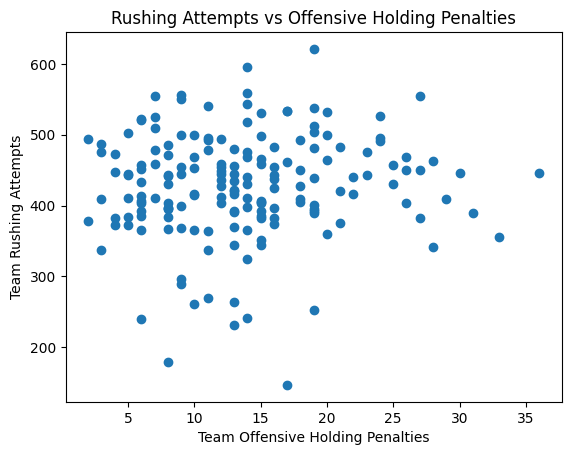

In [ ]:
# Code here for Q2
rushing_holding = pd.merge(yearly_offensive_holding, yearly_team_carries, on=['Year', 'Team'], how='inner')

display(rushing_holding)

plt.scatter(data=rushing_holding, x='Offensive Holding', y='Rushing Attempts')
plt.ylabel('Team Rushing Attempts')
plt.xlabel('Team Offensive Holding Penalties')
plt.title('Rushing Attempts vs Offensive Holding Penalties')
plt.show()

## Interpreter: Richard Tan

### Q1:
Do northern divisions have more rushing attempts than southern divisions?

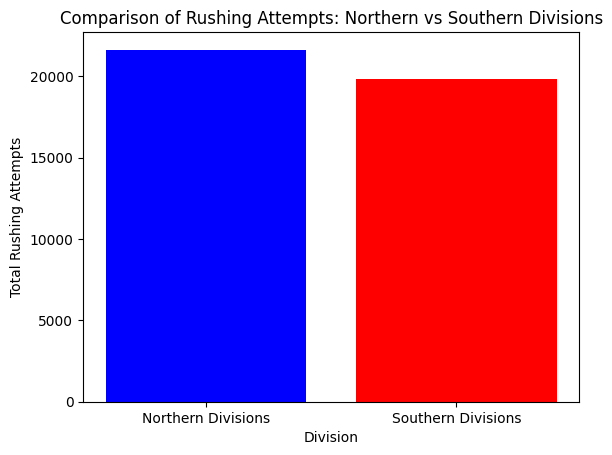

,Rank,Name,Team,Position,Games Played,Rushing Attempts,Rushing Yards,Avg Yards per Rush Attempt,Long Rushing,20+ Yard Rushes,Rushing Touchdowns,Rushing Yards per Game,Rushing Fumbles,Rushing Fumbles Lost,Rushing First Downs,Year
0,1,Derrick Henry,TEN,RB,15,303,"1,540",5.1,74,9,16,102.7,5,3,73,2019
1,2,Nick Chubb,CLE,RB,16,298,"1,494",5.0,88,11,8,93.4,2,2,62,2019
2,3,Christian McCaffrey,CAR,RB,16,287,"1,387",4.8,84,6,15,86.7,1,0,56,2019
3,4,Ezekiel Elliott,DAL,RB,16,301,"1,357",4.5,33,4,12,84.8,3,2,78,2019
4,5,Chris Carson,SEA,RB,15,278,"1,230",4.4,59,8,7,82.0,6,3,75,2019
5,6,Lamar Jackson,BAL,QB,15,176,"1,206",6.9,47,11,7,80.4,8,2,71,2019
6,7,Leonard Fournette,JAX,RB,15,265,"1,152",4.3,81,7,3,76.8,0,0,55,2019
7,8,Josh Jacobs,OAK,RB,13,242,"1,150",4.8,51,8,7,88.5,1,1,53,2019
8,9,Joe Mixon,CIN,RB,16,278,"1,137",4.1,41,6,5,71.1,0,0,56,2019
9,10,Dalvin Cook,MIN,RB,14,250,"1,135",4.5,75,7,13,81.1,3,2,60,2019


In [ ]:
# Code here for Q1
penalties = pd.read_csv('Total_Penalties.csv')
passing = pd.read_csv('Total_Passing.csv')
rushing = pd.read_csv('Total_Rushing.csv')
penalties.head()
#List of NFC North and AFC North teams
northern = ['CLE', 'PIT', 'BAL', 'CIN', 'DET', 'GB', 'MIN', 'CHI']

#List of NFC South and AFC South teams
southern = ['HOU', 'IND', 'JAX', 'TEN', 'TB', 'ATL', 'CAR', 'NO']

#Mask
northern_data = rushing[rushing["Team"].isin(northern)]
southern_data = rushing[rushing["Team"].isin(southern)]

#Calculate the sum of rushing attempts
northern_attempts = northern_data["Rushing Attempts"].sum()
southern_attempts = southern_data["Rushing Attempts"].sum()

#Plot
plt.bar(["Northern Divisions", "Southern Divisions"], [northern_attempts, southern_attempts], color=['blue', 'red'])
plt.xlabel("Division")
plt.ylabel("Total Rushing Attempts")
plt.title("Comparison of Rushing Attempts: Northern vs Southern Divisions")
plt.show()
rushing.head(10)

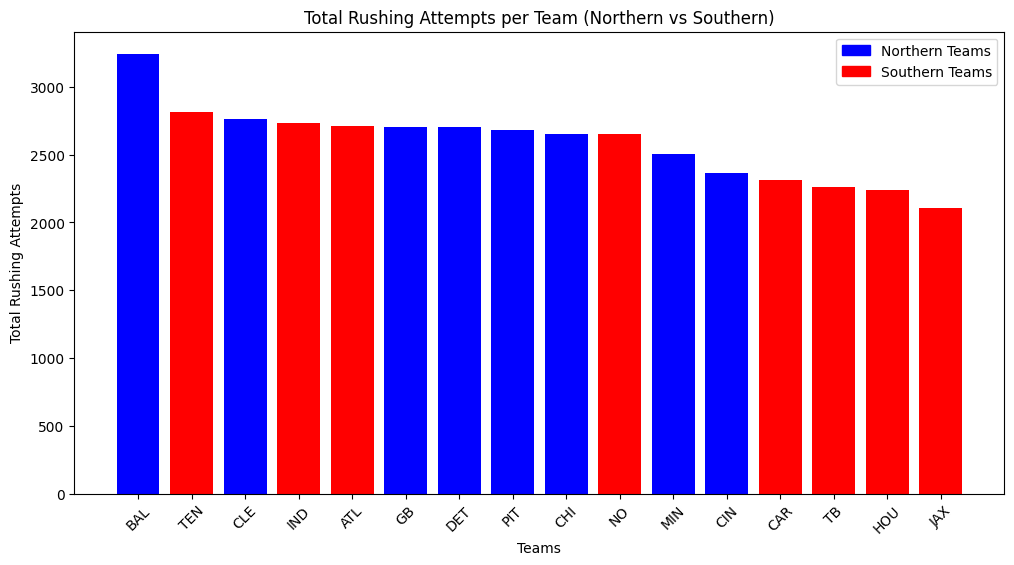

In [ ]:
team_rushing = rushing.groupby("Team")["Rushing Attempts"].sum().reset_index()
team_rushing = team_rushing[team_rushing["Team"].isin(northern + southern)]
team_rushing["Division"] = team_rushing["Team"].apply(lambda x: "Northern" if x in northern else "Southern")
colors = {"Northern": "blue", "Southern": "red"}

#Sort teams by rushing attempts
team_rushing = team_rushing.sort_values(by="Rushing Attempts", ascending=False)

#Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(team_rushing["Team"], team_rushing["Rushing Attempts"], color=[colors[d] for d in team_rushing["Division"]])

#Labels
plt.xlabel("Teams")
plt.ylabel("Total Rushing Attempts")
plt.title("Total Rushing Attempts per Team (Northern vs Southern)")
plt.xticks(rotation=45)

#Legend
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color="blue", label="Northern Teams"),
                    plt.Rectangle((0, 0), 1, 1, color="red", label="Southern Teams")],
           loc="upper right")

plt.show()

### Q2:
Does a team a with more defensive pass interference calls against them
have more interceptions?

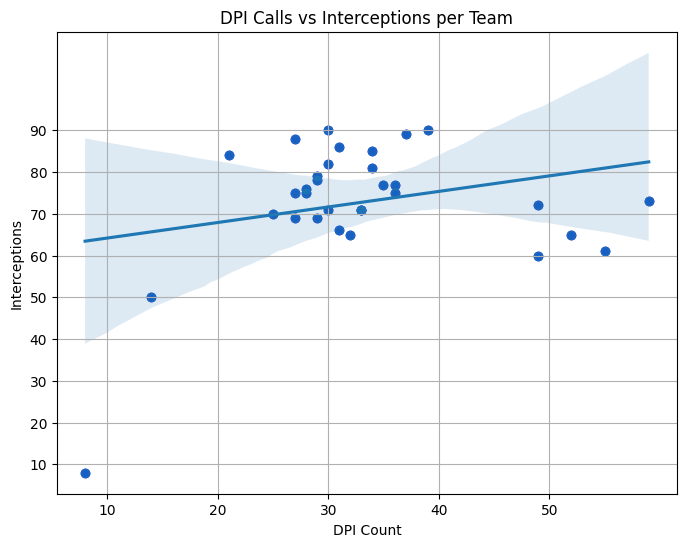

In [ ]:
# Code here for Q2
import pandas as pd
import re

#Counts number of defensive pass inteference penalties
def extract_dpi_count(penalty_string):
    #Get the number in the parentheses out for each defensive pass interference call.
    match = re.search(r"Defensive Pass Interference \((\d+)\)", penalty_string)
    return int(match.group(1)) if match else 0


penalties["DPI Count"] = penalties["Penalty Types"].apply(extract_dpi_count)
dpi_per_team = penalties.groupby("Team")["DPI Count"].sum().reset_index()

#Mapping team names to their abbreviations
team_name_map = {
    "Arizona": "ARI", "Atlanta": "ATL", "Baltimore": "BAL", "Buffalo": "BUF", "Carolina": "CAR",
    "Chicago": "CHI", "Cincinnati": "CIN", "Cleveland": "CLE", "Dallas": "DAL", "Denver": "DEN",
    "Detroit": "DET", "Green Bay": "GB", "Houston": "HOU", "Indianapolis": "IND", "Jacksonville": "JAX",
    "Kansas City": "KC", "Las Vegas": "LV", "LA Chargers": "LAC", "LA Rams": "LAR", "Miami": "MIA",
    "Minnesota": "MIN", "New England": "NE", "New Orleans": "NO", "N.Y. Giants": "NYG", "N.Y. Jets": "NYJ",
    "Oakland": "OAK", "Philadelphia": "PHI", "Pittsburgh": "PIT", "San Francisco": "SF", "Seattle": "SEA",
    "Tampa Bay": "TB", "Tennessee": "TEN", "Washington": "WAS"
}
dpi_per_team['Team'] = dpi_per_team['Team'].map(team_name_map)
interception_by_team = passing.groupby("Team")["Interceptions"].sum().reset_index()
interception_by_team =interception_by_team[interception_by_team['Team'] != "INE"]
combined_data = pd.merge(dpi_per_team, interception_by_team, on="Team")

plt.figure(figsize=(8, 6))
plt.scatter(combined_data["DPI Count"], combined_data["Interceptions"], color='blue', label="Teams")
plt.title("DPI Calls vs Interceptions per Team")
plt.xlabel("Defensive Pass Interference (DPI) Calls")
plt.ylabel("Interceptions")
plt.grid(True)
plt.xticks(range(0, combined_data["DPI Count"].max() + 1, 10))
plt.yticks(range(0, combined_data["Interceptions"].max() + 1, 10))
sns.regplot(x=combined_data["DPI Count"], y = combined_data["Interceptions"])
plt.show()

## Orator: Owen Vescio

### Q1:
Do certain positions commit more penalties than others?

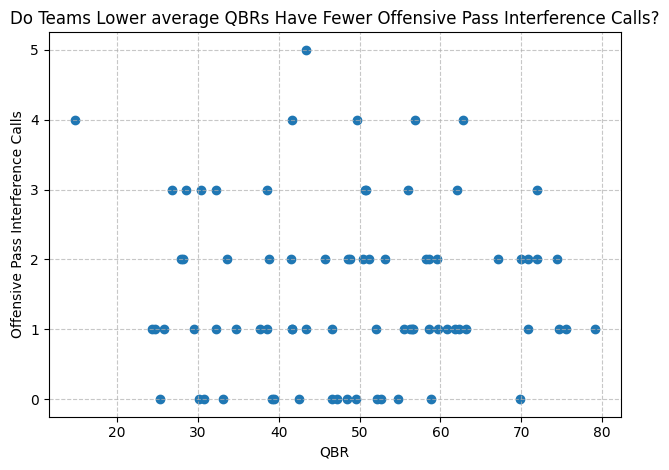

In [ ]:
# Code here for Q1
# Filter to quarterbacks for passing and wide receivers for penalties only
Total_Passing = pd.read_csv("Total_Passing.csv")
Total_Penalties = pd.read_csv("Total_Penalties.csv")


pass_qbs = Total_Passing[Total_Passing['Position'] == 'QB'].copy()
pen_wrs = Total_Penalties[Total_Penalties['Position'] == 'WR'].copy()

# Count OPI penalties from text
def count_OPI(penalties_str):
    if pd.isna(penalties_str):
        return 0
    total = 0
    penalties = penalties_str.split(',')
    for p in penalties:
        p = p.strip()
        if p.startswith("Offensive Pass Interference"):
            # Example: "Offensive Pass Interference (4)"
            if '(' in p and ')' in p:
                try:
                    count = int(p.split('(')[1].split(')')[0])
                    total += count
                except ValueError:
                    continue  # if it fails to parse, just skip it
    return total

pen_wrs['Offensive Pass Interference'] = pen_wrs['Penalty Types'].apply(count_OPI)


# Map full team names to abbreviations
team_name_map = {
    "Arizona": "ARI", "Atlanta": "ATL", "Baltimore": "BAL", "Buffalo": "BUF", "Carolina": "CAR",
    "Chicago": "CHI", "Cincinnati": "CIN", "Cleveland": "CLE", "Dallas": "DAL", "Denver": "DEN",
    "Detroit": "DET", "Green Bay": "GB", "Houston": "HOU", "Indianapolis": "IND", "Jacksonville": "JAX",
    "Kansas City": "KC", "Las Vegas": "LV", "LA Chargers": "LAC", "LA Rams": "LAR", "Miami": "MIA",
    "Minnesota": "MIN", "New England": "NE", "New Orleans": "NO", "NY Giants": "NYG", "NY Jets": "NYJ",
    "Philadelphia": "PHI", "Pittsburgh": "PIT", "San Francisco": "SF", "Seattle": "SEA",
    "Tampa Bay": "TB", "Tennessee": "TEN", "Washington": "WAS"
}
pen_wrs['Team'] = pen_wrs['Team'].map(team_name_map)

# Group both datasets
pen_grouped = pen_wrs.groupby(['Team', 'Position', 'Year'])['Offensive Pass Interference'].sum().reset_index()
pass_grouped = pass_qbs.groupby(['Team', 'Position', 'Year'])['Adjusted QBR'].mean().reset_index()

# Merge them
merged = pd.merge(pen_grouped, pass_grouped, on=['Team', 'Year'])


# Plotting
plt.scatter(merged['Adjusted QBR'], merged['Offensive Pass Interference'])
plt.xlabel('QBR')
plt.ylabel('Offensive Pass Interference Calls')
plt.title('Do Teams Lower average QBRs Have Fewer Offensive Pass Interference Calls?')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NOTE: We changed the question above from what it was originally in the project proposal. Our original question asked about analyzing the number of penalties as each season progresses, but to do this, we would've had to scrape the penalty data for each week across all 6 seasons, which would've required 100+ more datasets to scrape. Thus, we changed to a question more focused on our penalty trends across seasons in looking at penalties by position to see if anything stood out more than others.


### Q2:
Do teams with quarterbacks with lower QBRs have more offensive pass
interference calls against their team?

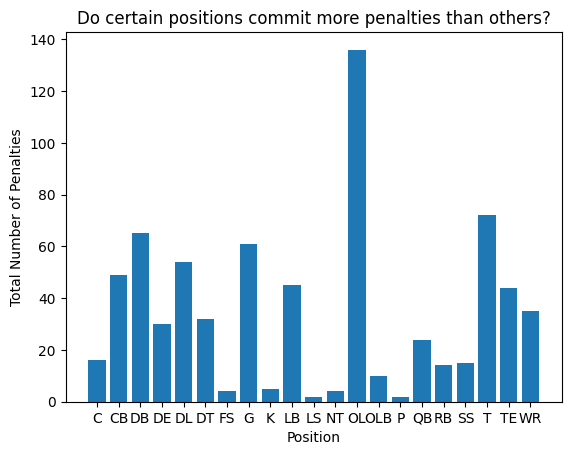

In [ ]:
# Code here for Q2
pen_count = Total_Penalties[['Position', 'Penalty Count']]
pen_count_pos = pen_count.groupby(['Position', 'Penalty Count']).sum().reset_index()
pen_by_pos = pen_count_pos.groupby('Position').sum().reset_index()
plt.bar(x = pen_by_pos['Position'], height = pen_by_pos['Penalty Count']);
plt.title('Do certain positions commit more penalties than others?');
plt.xlabel('Position');
plt.ylabel('Total Number of Penalties');

## Orator: Jacob Cowley


### Q1:
Do offensive and defensive lineman contribute to a higher percentage of
team penalties than other positions?

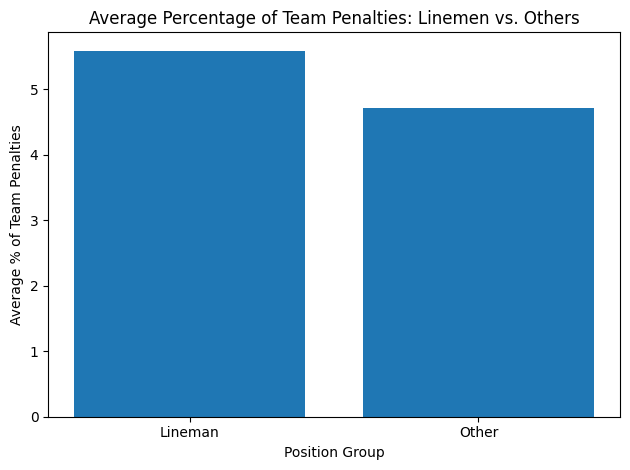

In [ ]:
# Code here for Q1
df = pd.read_csv("Total_Penalties.csv")


# Group OL and DL into one "Lineman" category, all others as "Other"
df['Position Group'] = np.where(df['Position'].isin(['OL', 'DL', 'C', 'DL', 'DT', 'G', 'NT']), 'Lineman', 'Other')


# Calculate the average 'Percent of Team' penalties per group
grouped = df.groupby('Position Group')['Percent of Team'].mean().reset_index()


# Plotting
plt.figure()
plt.bar(grouped['Position Group'], grouped['Percent of Team'])
plt.title('Average Percentage of Team Penalties: Linemen vs. Others')
plt.ylabel('Average % of Team Penalties')
plt.xlabel('Position Group')
plt.tight_layout()
plt.show()

### Q2:
Do quarterbacks with more interceptions thrown have less intentional
grounding calls against them?

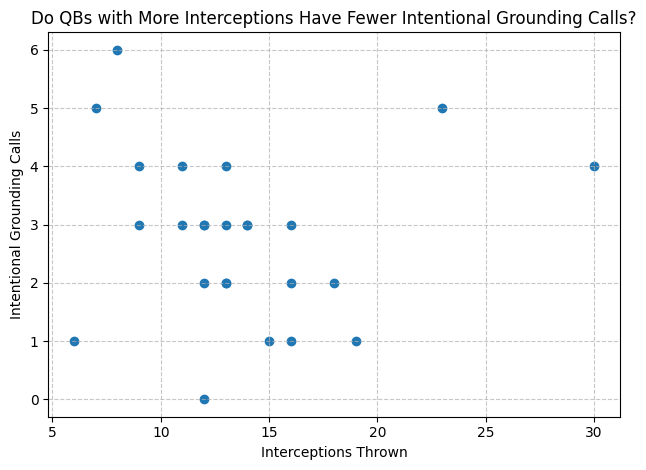

In [ ]:
# Code here for Q2
penalties_df = pd.read_csv("Total_Penalties.csv")
passing_df = pd.read_csv("Total_Passing.csv")


# Filter to quarterbacks only
pen_qbs = penalties_df[penalties_df['Position'] == 'QB'].copy()
pass_qbs = passing_df[passing_df['Position'] == 'QB'].copy()


# Count intentional grounding penalties from text


def get_intentional_grounding(penalty_str):
    match = re.search(r'Intentional Grounding\s*\((\d+)\)', penalty_str)
    return int(match.group(1)) if match else 0


pen_qbs['Intentional Grounding'] = pen_qbs['Penalty Types'].apply(get_intentional_grounding)


# Map full team names to abbreviations
team_name_map = {
    "Arizona": "ARI", "Atlanta": "ATL", "Baltimore": "BAL", "Buffalo": "BUF", "Carolina": "CAR",
    "Chicago": "CHI", "Cincinnati": "CIN", "Cleveland": "CLE", "Dallas": "DAL", "Denver": "DEN",
    "Detroit": "DET", "Green Bay": "GB", "Houston": "HOU", "Indianapolis": "IND", "Jacksonville": "JAX",
    "Kansas City": "KC", "Las Vegas": "LV", "LA Chargers": "LAC", "LA Rams": "LAR", "Miami": "MIA",
    "Minnesota": "MIN", "New England": "NE", "New Orleans": "NO", "NY Giants": "NYG", "NY Jets": "NYJ",
    "Philadelphia": "PHI", "Pittsburgh": "PIT", "San Francisco": "SF", "Seattle": "SEA",
    "Tampa Bay": "TB", "Tennessee": "TEN", "Washington": "WAS"
}
pen_qbs['Team'] = pen_qbs['Team'].map(team_name_map)


# Group both datasets
pen_grouped = pen_qbs.groupby(['Team', 'Position', 'Year'])['Intentional Grounding'].sum().reset_index()
pass_grouped = pass_qbs.groupby(['Team', 'Position', 'Year'])['Interceptions'].sum().reset_index()


# Merge them
merged = pd.merge(pen_grouped, pass_grouped, on=['Team', 'Position', 'Year'])


# Plotting
plt.figure()
plt.scatter(merged['Interceptions'], merged['Intentional Grounding'])
plt.xlabel('Interceptions Thrown')
plt.ylabel('Intentional Grounding Calls')
plt.title('Intentional Grounding Calls vs. QB Interceptions')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Deliverer: Kavin Sankar

### Q1:
Do quarterbacks with more sacks taken have fewer interceptions thrown?

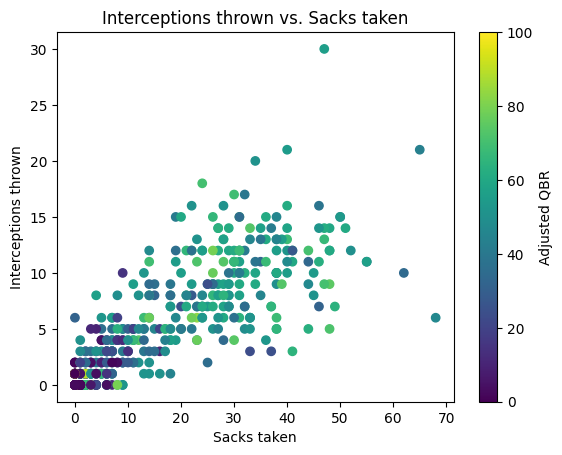

In [ ]:
# Code here for Q1
passing = pd.read_csv("Total_Passing.csv")
penalties = pd.read_csv("Total_Penalties.csv")
defense = pd.read_csv("Total_Defense.csv")

#Plotting interceptions vs sacks, with a colorbar for QBR
passing.head()
plt.scatter(x=passing["Total Sacks"], y=passing["Interceptions"], c=passing["Adjusted QBR"])
plt.title("Interceptions thrown vs. Sacks taken")
plt.xlabel("Sacks taken")
plt.ylabel("Interceptions thrown")
plt.colorbar().set_label("Adjusted QBR")
plt.show();

### Q2:
As a teams tackles for loss increases does illegal use of hands and
facemask calls increase?

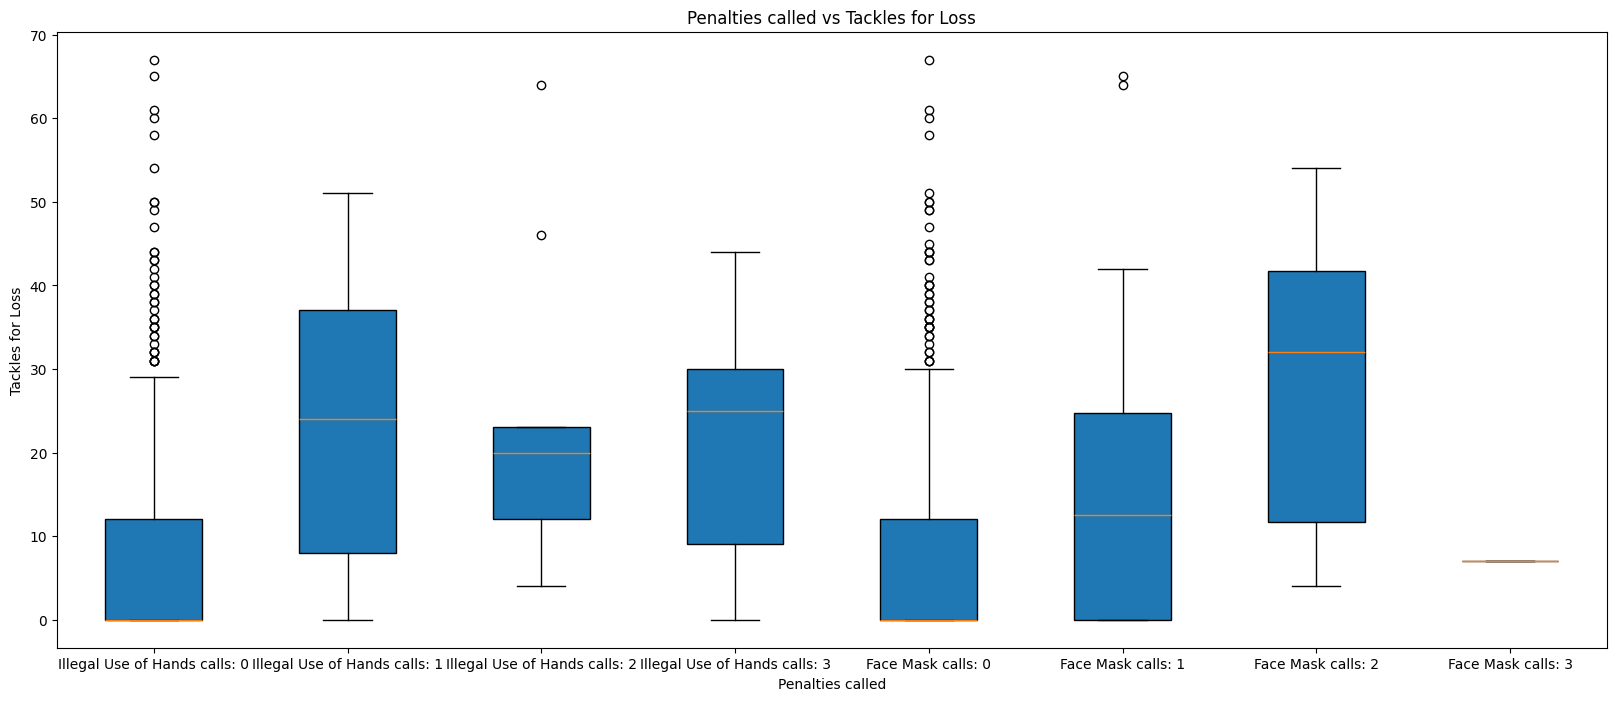

In [ ]:
# Code here for Q2
penalties["Illegal Use of Hands"] = 0
penalties["Face Masks"] = 0

#Extracting illegal use of hands counts
illegal_use_hands = penalties["Penalty Types"].str.extract(r"Illegal Use of Hands \((\d+)\)")
penalties["Illegal Use of Hands"] = illegal_use_hands[0].fillna(0).astype(int)

#Extracting face mask counts
face_mask_15 = penalties["Penalty Types"].str.extract(r"Face Mask \(15 Yards\) \((\d+)\)")
penalties["Face Masks"] = face_mask_15[0].fillna(0).astype(int)

face_mask_general = penalties["Penalty Types"].str.extract(r"Face Mask \((\d+)\)")
penalties.loc[penalties["Face Masks"] == 0, "Face Masks"] = face_mask_general[0].fillna(0).astype(int)


merged_df = pd.merge(penalties, defense, on=['Name', 'Year'], how='outer')
merged_df

team_name_map = {
    "Arizona": "ARI", "Atlanta": "ATL", "Baltimore": "BAL", "Buffalo": "BUF", "Carolina": "CAR",
    "Chicago": "CHI", "Cincinnati": "CIN", "Cleveland": "CLE", "Dallas": "DAL", "Denver": "DEN",
    "Detroit": "DET", "Green Bay": "GB", "Houston": "HOU", "Indianapolis": "IND", "Jacksonville": "JAX",
    "Kansas City": "KC", "Las Vegas": "LV", "LA Chargers": "LAC", "LA Rams": "LAR", "Miami": "MIA",
    "Minnesota": "MIN", "New England": "NE", "New Orleans": "NO", "NY Giants": "NYG", "NY Jets": "NYJ",
    "Philadelphia": "PHI", "Pittsburgh": "PIT", "San Francisco": "SF", "Seattle": "SEA",
    "Tampa Bay": "TB", "Tennessee": "TEN", "Washington": "WAS"
}

penalties["Team"] = penalties["Team"].map(team_name_map)

pen_grouped_hands = penalties.groupby(['Team', 'Position', 'Year'])['Illegal Use of Hands'].sum().reset_index()
pen_grouped_face = penalties.groupby(['Team', 'Position', 'Year'])['Face Masks'].sum().reset_index()
def_grouped = defense.groupby(['Team', 'Position', 'Year'])['Tackles for Loss'].sum().reset_index()
merged_df = pd.merge(pd.merge(pen_grouped_hands, pen_grouped_face, on=['Team', 'Position', 'Year']), def_grouped, on=['Team', 'Position', 'Year'])

#Plotting tackles for loss distribution based on how many penalties were called
data = [
    merged_df[merged_df["Illegal Use of Hands"] == 0]["Tackles for Loss"].dropna(),
    merged_df[merged_df["Illegal Use of Hands"] == 1]["Tackles for Loss"].dropna(),
    merged_df[merged_df["Illegal Use of Hands"] == 2]["Tackles for Loss"].dropna(),
    merged_df[merged_df["Illegal Use of Hands"] == 3]["Tackles for Loss"].dropna(),
    merged_df[merged_df["Face Masks"] == 0]["Tackles for Loss"].dropna(),
    merged_df[merged_df["Face Masks"] == 1]["Tackles for Loss"].dropna(),
    merged_df[merged_df["Face Masks"] == 2]["Tackles for Loss"].dropna(),
    merged_df[merged_df["Face Masks"] == 3]["Tackles for Loss"].dropna()
]

labels = [
    "Illegal Use of Hands calls: 0",
    "Illegal Use of Hands calls: 1",
    "Illegal Use of Hands calls: 2",
    "Illegal Use of Hands calls: 3",
    "Face Mask calls: 0",
    "Face Mask calls: 1",
    "Face Mask calls: 2",
    "Face Mask calls: 3"
]

# Create boxplot
plt.figure(figsize=(20, 8))
plt.boxplot(data, tick_labels=labels, vert=True, patch_artist=True)

plt.title("Penalties called vs Tackles for Loss")
plt.xlabel("Penalties called")
plt.ylabel("Tackles for Loss")
plt.show();

## Follow-up Questions

### New Questions Based Off Initial Investigation

- Q1: Can we predict a team's total rushing yards from the amount of each offensive line penalty, specifically offensive holding, ineligible man downfield, false start, unnecessary roughness, illegal block in the back, and illegal use of hands?
- Q2: Can we predict a team's total passing yards based on interceptions, sacks taken, and intentional grounding?
- Q3: Can we classify a player's position based on their games played and their total number of penalties?
- Q4: Can we predict the number of interceptions per team based on DPI, defensive holding, and passes defended?

### Investigation of Follow-up Questions

Our group decided to investigate Q1 and Q2 in further detail.

SHOW AT LEAST 2 TABLES OR FIGURES BELOW THAT EXPLORE ANSWERS FOR THE QUESTIONS YOU ARE INVESTIGATING FURTHER.

In [ ]:
# Question 1 further exploration, we made a VIF table for our features to see if there was high multicollinearity between our features.
def extract_penalty_count(penalty_str, penalty_name):
    pattern = rf'{re.escape(penalty_name)}\s*\((\d+)\)'
    match = re.search(pattern, penalty_str)
    return int(match.group(1)) if match else 0


# List of penalties to extract
penalties_to_extract = [
    "Offensive Holding",
    'Ineligible Downfield Pass',  # corresponds to "Ineligible Man Downfield"
    'False Start',
    'Unnecessary Roughness',
    'Illegal Block Above the Waist',  # best match for "Illegal Block in the Back"
    'Illegal Use of Hands'
]

# Add each penalty as its own column
for penalty in penalties_to_extract:
    penalties[penalty] = penalties['Penalty Types'].apply(lambda x: extract_penalty_count(x, penalty))


yearly_oline_penalties = penalties.groupby(['Year', 'Team'])[['Offensive Holding', 'Ineligible Downfield Pass', 'False Start', 'Unnecessary Roughness', 'Illegal Block Above the Waist', 'Illegal Use of Hands']].sum().reset_index()
rushing['Rushing Yards'] = rushing['Rushing Yards'].str.replace(',','').astype(int)
yearly_team_rushing_yards = rushing.groupby(['Year','Team'])['Rushing Yards'].sum().reset_index()

penalty_rushing = pd.merge(yearly_oline_penalties, yearly_team_rushing_yards, on=['Team', 'Year'], how='inner').drop(columns=['Year','Team'])

X = penalty_rushing.drop('Rushing Yards', axis=1)
y = penalty_rushing['Rushing Yards']

data = pd.DataFrame()
data['Feature'] = X.columns
data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(data)

                         Feature       VIF
0              Offensive Holding  7.893833
1      Ineligible Downfield Pass  2.207527
2                    False Start  6.299312
3          Unnecessary Roughness  2.673316
4  Illegal Block Above the Waist  1.821680
5           Illegal Use of Hands  2.350641


In [ ]:
# Question 2 further exploration, we wanted to see totals for all features and target variables
def count_IG(penalties_str):
    if pd.isna(penalties_str):
        return 0
    total = 0
    penalties = penalties_str.split(',')
    for p in penalties:
        p = p.strip()
        if p.startswith("Intentional Grounding"):
            # Example: "Intentional Grounding (4)"
            if '(' in p and ')' in p:
                try:
                    count = int(p.split('(')[1].split(')')[0])
                    total += count
                except ValueError:
                    continue  # if it fails to parse, just skip it
    return total

#Map to change Oakland Raiders to Las Vegas Raiders
oak_map = {
    "ARI": "ARI", "ATL": "ATL", "BAL": "BAL", "BUF": "BUF", "CAR": "CAR",
    "CHI": "CHI", "CIN": "CIN", "CLE": "CLE", "DAL": "DAL", "DEN": "DEN",
    "DET": "DET", "GB": "GB", "HOU": "HOU", "IND": "IND", "JAX": "JAX",
    "KC": "KC", "LV": "LV", "LAC": "LAC", "LAR": "LAR", "MIA": "MIA",
    "MIN": "MIN", "NE": "NE", "NO": "NO", "NYG": "NYG", "NYJ": "NYJ",
    "PHI": "PHI", "PIT": "PIT", "SF": "SF", "SEA": "SEA",
    "TB": "TB", "TEN": "TEN", "WSH": "WSH", "OAK": "LV"
}

pass_qbs = Total_Passing[Total_Passing['Position'] == 'QB'].copy()
pass_qbs['Team'] = pass_qbs['Team'].map(oak_map)
pass_qbs['Passing Yards'] = pass_qbs['Passing Yards'].str.replace(',', '').astype(int)
Total_Penalties['Intentional Grounding'] = Total_Penalties['Penalty Types'].apply(count_IG)
pen_grouped = Total_Penalties.groupby(['Team', 'Position', 'Year'])['Intentional Grounding'].sum().reset_index()
pen_grouped['Team'] = pen_grouped['Team'].map(team_name_map)
Total_Passing_X = pass_qbs[['Team', 'Position', 'Passing Yards', 'Interceptions', 'Total Sacks']]
merged = pd.merge(pen_grouped, Total_Passing_X, on=['Team'], how="outer")
team_stats = merged.groupby(['Team'])[['Intentional Grounding', 'Passing Yards', 'Interceptions', 'Total Sacks']].sum().reset_index()

#Dropping misabbreviated washington row with no data
team_stats = team_stats[team_stats["Team"] != "WAS"]
team_stats = team_stats.reset_index()

team_stats

,index,Team,Intentional Grounding,Passing Yards,Interceptions,Total Sacks
0,0,ARI,56.0,705792.0,2272.0,6944.0
1,1,ATL,36.0,614425.0,2125.0,6000.0
2,2,BAL,75.0,666221.0,1829.0,6789.0
3,3,BUF,0.0,855916.0,2618.0,5576.0
4,4,CAR,0.0,631129.0,2790.0,8153.0
5,5,CHI,0.0,489684.0,1898.0,7254.0
6,6,CIN,65.0,680784.0,1950.0,7540.0
7,7,CLE,187.0,648285.0,2871.0,7458.0
8,8,DAL,0.0,1103679.0,3157.0,8364.0
9,9,DEN,0.0,632016.0,2277.0,7227.0


In [ ]:
# Question 2 further exploration, we made a VIF table for our features to see if there was high multicollinearity between our features.

#Gets intentional grounding counts
def get_intentional_grounding(penalty_str):
    match = re.search(r'Intentional Grounding\s*\((\d+)\)', penalty_str)
    return int(match.group(1)) if match else 0


passing = pd.read_csv('Total_Passing.csv')
penalties = pd.read_csv('Total_Penalties.csv')

#Mapping team names to their abbreviations
team_name_map = {
    "Arizona": "ARI", "Atlanta": "ATL", "Baltimore": "BAL", "Buffalo": "BUF", "Carolina": "CAR",
    "Chicago": "CHI", "Cincinnati": "CIN", "Cleveland": "CLE", "Dallas": "DAL", "Denver": "DEN",
    "Detroit": "DET", "Green Bay": "GB", "Houston": "HOU", "Indianapolis": "IND", "Jacksonville": "JAX",
    "Kansas City": "KC", "Las Vegas": "LV", "LA Chargers": "LAC", "LA Rams": "LAR", "Miami": "MIA",
    "Minnesota": "MIN", "New England": "NE", "New Orleans": "NO", "NY Giants": "NYG", "NY Jets": "NYJ",
    "Philadelphia": "PHI", "Pittsburgh": "PIT", "San Francisco": "SF", "Seattle": "SEA",
    "Tampa Bay": "TB", "Tennessee": "TEN", "Washington": "WSH"
}


penalties['Team'] = penalties['Team'].map(team_name_map)


penalties['Intentional Grounding'] = penalties['Penalty Types'].apply(get_intentional_grounding)


yearly_team_intentional_grounding = penalties.groupby(['Year','Team'])['Intentional Grounding'].sum().reset_index()
passing['Passing Yards'] = passing['Passing Yards'].str.replace(',','').astype(int)
yearly_team_passing = passing.groupby(['Year','Team'])[['Passing Yards', 'Interceptions', 'Total Sacks']].sum().reset_index()


yearly_team_passing.head(32)


penalty_passing = pd.merge(yearly_team_intentional_grounding, yearly_team_passing, on=['Team', 'Year'], how='inner').drop(columns=['Year','Team'])
penalty_passing


X = penalty_passing.drop('Passing Yards', axis=1)
y = penalty_passing['Passing Yards']


data = pd.DataFrame()
data['Feature'] = X.columns
data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(data)

                 Feature       VIF
0  Intentional Grounding  1.138440
1          Interceptions  8.059156
2            Total Sacks  8.043869


## Summary

GIVE A 2 PARAGRAPH SUMMARY.

PARAGRAPH 1 SHOULD DESCRIBE WHAT YOU LEARNED ABOUT YOUR DATA FROM INVESTIGATING THE INITIAL QUESTIONS. DID YOU FIND ANYTHING UNUSUAL IN YOUR DATA? DID ANYTHING SURPRISE YOU? WHICH OF THE INITIAL QUESTIONS WERE HELPFUL IN LEADING YOU TO MORE QUESTIONS?

As we started digging into our data, a few patterns stood out that helped us come up with more focused questions. One thing that caught our attention was the sharp increase in both pre-snap and pass interference penalties in 2024. That made us question whether changes in team playing style or officiating are causing this spike. We also noticed that offensive linemen, and linemen in general, were responsible for a much higher number of penalties compared to other positions. That led us to think about how specific penalties like holding or false starts might be affecting a team's rushing performance. On the passing side, we were curious whether total passing yards could be predicted using things like interceptions, sacks, or intentional grounding calls. A few of our graphs related to quarterbacks showed some surprising correlations, such as the moderate positive correlation between interceptions thrown and sacks taken, or the moderate negative correlation found between intentional grounding calls and interceptions thrown. One thing that we did find unusual was how uncorrelated several of the graphs seemed to be, such as our graphs examining rushing data and penalties, or our graph comparing QBRs to pass interference calls. The trends we saw in our graphs related to linemen and quarterbacks pushed us to dive deeper into our new questions (Q1 and Q2), in order to explore if we can predict running back or quarterback stats based on these penalty trends. Overall, the data raised some interesting and more complex questions about how penalties connect to offensive success.


PARAGRAPH 2 SHOULD SUMMARIZE WHAT YOU LEARNED FROM INVESTIGATING THE FOLLOW-UP QUESTIONS. WHY ARE THESE FOLLOW-UP QUESTIONS INTERESTING FOR INVESTIGATION? DESCRIBE THE TABLES/FIGURES YOU USED TO EXPLORE ANSWERS TO THESE FOLLOW-UP QUESTIONS? WHAT DID YOU LEARN FROM THE TABLES/FIGURES REGARDING THE FOLLOW-UP QUESTIONS YOU PROPOSED?

We decided to further explore our first and second question, as they involved predicting rushing or passing yards for a team based on data about the penalties the team has committed, along with some other relevant information such as interceptions or sacks. For the first question since we had a lot of potential features we wanted to make a table with the VIF of all our potential features to see if any of the features had moderate or high multicollinearity. We had two features with moderate multicollinearity while the rest of the features had low multicollinearity. This showed us that the features we chose were good choice and we shouldn't have a lot of trouble with multicollinearity when generating our predictive models. For question 2 we did the same thing by creating a table with the VIF of all of our potential features for predicting passing yards. We found that two of the features had moderate multicollinearity, while one feature had low multicollinearity. This is not necessarily bad, but it lets us know to be aware of potential issues with multicollinearity when generating our predictive model for question 2. We also created a table of the sums of the variables we will use to predict passing yards for each team from 2019-2024, which shows us there is a lot of variation between teams for these variables, which lets us know that there are stark differences between the teams which will hopefully make it easier for the model to predict which team is which based on the features we provide. These analyses of the tables we generated lets us know what to expect when generating our predictive models, and what to be wary of, such as multicollinearity for our model for question 2.